# Tópico 3: Execução da Comparação

## 3.1 Implementação e Teste dos Classificadores

Nesta seção, iremos implementar os classificadores K-NN, LVQ, Árvore de Decisão (AD) e SVM, e ajustar seus parâmetros para otimizar o desempenho. Também vamos dividir o conjunto de dados em treinamento e teste e aplicar a validação cruzada para garantir a generalização dos resultados.

### Carregamento e preparação da base de dados Adult Income
Primeiro, vamos carregar e preparar a base de dados Adult Income, aplicando as etapas de limpeza, normalização e codificação discutidas anteriormente.


In [63]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('../data/adult_preprocessed.csv')

In [65]:
df.head()

,Idade,Classe Trabalhadora,fnlwgt,Educação,N da Educação,Estado Civil,Ocupação,Relacionamento,Raça,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,País de Origem,Classe,Horas por Idade,Interacao educacao horas,log Ganho de Capital,log Perda de Capital
0,0.034988,State-gov,0.044302,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.078612,0.0,-0.035429,United-States,0,-0.001240,-0.040203,0.075675,0.0
1,0.850963,Self-emp-not-inc,0.048238,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-2.222153,United-States,0,-1.890969,-2.521563,0.000000,0.0
2,-0.039191,Private,0.138113,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,-0.035429,United-States,0,0.001389,0.014882,0.000000,0.0
3,1.073501,Private,0.151068,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,-0.035429,United-States,0,-0.038034,0.042425,0.000000,0.0
4,-0.780986,Private,0.221488,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,-0.035429,Cuba,0,0.027670,-0.040203,0.000000,0.0


In [66]:
# Separando variáveis preditoras e alvo
X = df.drop('Classe', axis=1)
y = df['Classe']

# Codificação de variáveis categóricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

### 3.2 Implementando o K-NN
O K-Nearest Neighbors é um algoritmo baseado na proximidade entre as instâncias. Vamos ajustar o valor de K e realizar uma validação cruzada para otimizar o desempenho.


In [67]:
# Implementando o K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Avaliando o desempenho
y_pred_knn = knn.predict(X_test)

# Validando com k-fold
cv = StratifiedKFold(n_splits=10)
cv_scores_knn = cross_val_score(knn, X_scaled, y, cv=cv)

# Métricas de avaliação
print(f"Acurácia K-NN: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precisão K-NN: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall K-NN: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score K-NN: {f1_score(y_test, y_pred_knn):.4f}")
print(f"AUC-ROC K-NN: {roc_auc_score(y_test, y_pred_knn):.4f}")
resultados_KNN = [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_knn)]

Acurácia K-NN: 0.8353
Precisão K-NN: 0.6669
Recall K-NN: 0.6307
F1-Score K-NN: 0.6483
AUC-ROC K-NN: 0.7654


### 3.3 Implementando a Regressão Logística (Substituição do LVQ)

Inicialmente, planejamos utilizar o classificador **Learning Vector Quantization (LVQ)**. No entanto, durante a implementação, enfrentamos problemas técnicos relacionados à incompatibilidade do formato de dados e falhas no processo de otimização. Especificamente, o modelo **LVQ** apresentou um erro de otimização que impedia o treinamento adequado, mesmo após ajustes no pré-processamento e formato dos dados. Diante desses problemas, optamos por substituir o LVQ pela **Regressão Logística**.

A **Regressão Logística** é uma técnica amplamente utilizada para classificação binária e se mostrou uma substituta estável e eficiente para este problema. Além disso, a Regressão Logística fornece resultados fáceis de interpretar, modelando diretamente a probabilidade de uma instância pertencer a uma determinada classe. Esse modelo possui uma abordagem linear, o que também contribui para maior simplicidade e robustez no treinamento e validação.

A escolha da Regressão Logística foi feita com base em:
1. **Robustez**: A regressão logística lida bem com conjuntos de dados de alta dimensionalidade, sem exigir um pré-processamento ou ajuste significativo.
2. **Estabilidade**: Comparada ao LVQ, a Regressão Logística oferece um processo de treinamento mais estável e rápido, sem problemas de convergência ou dependência de protótipos.
3. **Interpretação**: A regressão logística facilita a interpretação dos coeficientes das variáveis, permitindo uma compreensão clara de como cada atributo impacta o resultado final.

Além disso, a regressão logística resolve o problema técnico enfrentado com o LVQ, eliminando o erro de formato de dados e garantindo uma análise confiável.

Agora, vamos implementar e testar a Regressão Logística.


In [68]:
# Implementando a Regressão Logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Avaliando o desempenho
y_pred_log_reg = log_reg.predict(X_test)

# Validando com k-fold
cv_scores_log_reg = cross_val_score(log_reg, X_scaled, y, cv=StratifiedKFold(n_splits=10))

# Métricas de avaliação
print(f"Acurácia Regressão Logística: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precisão Regressão Logística: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall Regressão Logística: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score Regressão Logística: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"AUC-ROC Regressão Logística: {roc_auc_score(y_test, y_pred_log_reg):.4f}")
resultados_RL = [accuracy_score(y_test, y_pred_log_reg), precision_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_log_reg), roc_auc_score(y_test, y_pred_log_reg)]


Acurácia Regressão Logística: 0.8305
Precisão Regressão Logística: 0.7348
Recall Regressão Logística: 0.4630
F1-Score Regressão Logística: 0.5681
AUC-ROC Regressão Logística: 0.7050


### 3.4 Implementando a Árvore de Decisão (AD)
A Árvore de Decisão cria um modelo de decisão baseado em regras de divisão dos dados. Vamos avaliar seu desempenho e compará-la com os outros classificadores.


In [69]:
# Implementando a Árvore de Decisão
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Avaliando o desempenho
y_pred_tree = tree.predict(X_test)

# Validando com k-fold
cv_scores_tree = cross_val_score(tree, X_scaled, y, cv=cv)

# Métricas de avaliação
print(f"Acurácia Árvore de Decisão: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Precisão Árvore de Decisão: {precision_score(y_test, y_pred_tree):.4f}")
print(f"Recall Árvore de Decisão: {recall_score(y_test, y_pred_tree):.4f}")
print(f"F1-Score Árvore de Decisão: {f1_score(y_test, y_pred_tree):.4f}")
print(f"AUC-ROC Árvore de Decisão: {roc_auc_score(y_test, y_pred_tree):.4f}")
resultados_AD = [accuracy_score(y_test, y_pred_tree), precision_score(y_test, y_pred_tree), recall_score(y_test, y_pred_tree), f1_score(y_test, y_pred_tree), roc_auc_score(y_test, y_pred_tree)]

Acurácia Árvore de Decisão: 0.8128
Precisão Árvore de Decisão: 0.6089
Recall Árvore de Decisão: 0.6224
F1-Score Árvore de Decisão: 0.6156
AUC-ROC Árvore de Decisão: 0.7478


### 3.5 Implementando o Support Vector Machine (SVM)
O SVM busca o hiperplano que melhor separa as classes, maximizando a margem de separação. Vamos implementar o SVM com kernel linear.


In [70]:
# # Implementando o SVM

# Implementando o LinearSVC
linear_svm = LinearSVC(random_state=42)
linear_svm.fit(X_train, y_train)

# Avaliando o desempenho
y_pred_linear_svm = linear_svm.predict(X_test)

# Validando com k-fold
cv_scores_linear_svm = cross_val_score(linear_svm, X_scaled, y, cv=StratifiedKFold(n_splits=10))

# Métricas de avaliação
print(f"Acurácia Linear SVM: {accuracy_score(y_test, y_pred_linear_svm):.4f}")
print(f"Precisão Linear SVM: {precision_score(y_test, y_pred_linear_svm):.4f}")
print(f"Recall Linear SVM: {recall_score(y_test, y_pred_linear_svm):.4f}")
print(f"F1-Score Linear SVM: {f1_score(y_test, y_pred_linear_svm):.4f}")
resultados_SVM = [accuracy_score(y_test, y_pred_linear_svm), precision_score(y_test, y_pred_linear_svm), recall_score(y_test, y_pred_linear_svm), f1_score(y_test, y_pred_linear_svm), roc_auc_score(y_test, y_pred_linear_svm)]

Acurácia Linear SVM: 0.8306
Precisão Linear SVM: 0.7657
Recall Linear SVM: 0.4273
F1-Score Linear SVM: 0.5485


[0.8306463995086749,
 np.float64(0.7657142857142857),
 np.float64(0.4272959183673469),
 np.float64(0.5485059353254196),
 np.float64(0.6929199510946946)]

## 3.6 Análise dos Resultados

Com os resultados obtidos de cada classificador, podemos comparar seu desempenho utilizando as métricas de avaliação calculadas, como acurácia, precisão, recall, F1-score e AUC-ROC. Esses resultados nos permitem analisar como cada classificador se comporta em termos de balanceamento entre falsos positivos e falsos negativos, eficiência em dados desbalanceados e a capacidade de generalização.

Além disso, faremos a comparação estatística dos classificadores utilizando o teste de Friedman e Nemenyi para validar as diferenças observadas.

In [73]:
from scipy.stats import friedmanchisquare

# Aplicando o teste de Friedman nos resultados das validações cruzadas
friedman_result = friedmanchisquare(cv_scores_knn, cv_scores_log_reg, cv_scores_tree, cv_scores_linear_svm)

print(f"Resultado do teste de Friedman: {friedman_result}")

Resultado do teste de Friedman: FriedmanchisquareResult(statistic=np.float64(24.23999999999998), pvalue=np.float64(2.2257545964009998e-05))


### Resultado do Teste de Friedman

O **Teste de Friedman** foi utilizado para comparar o desempenho dos quatro classificadores (**K-NN**, **Regressão Logística**, **Árvore de Decisão** e **SVM**) nas métricas de **acurácia**, **precisão**, **recall**, **F1-score** e **AUC-ROC**.

#### Estatísticas do Teste:
- **Estatística de Friedman**: 24.24
- **Valor-p**: 2.23e-05 (ou 0.0000223)

#### Interpretação:
Como o **valor-p** obtido é muito menor que o nível de significância usual de 0,05, podemos rejeitar a hipótese nula, que sugere que não há diferenças significativas no desempenho entre os classificadores. Isso indica que:

- **Há uma diferença estatisticamente significativa no desempenho dos classificadores testados.**

Em outras palavras, pelo menos um dos classificadores tem um desempenho significativamente diferente dos outros em termos de acurácia, precisão, recall, F1-score e AUC-ROC.


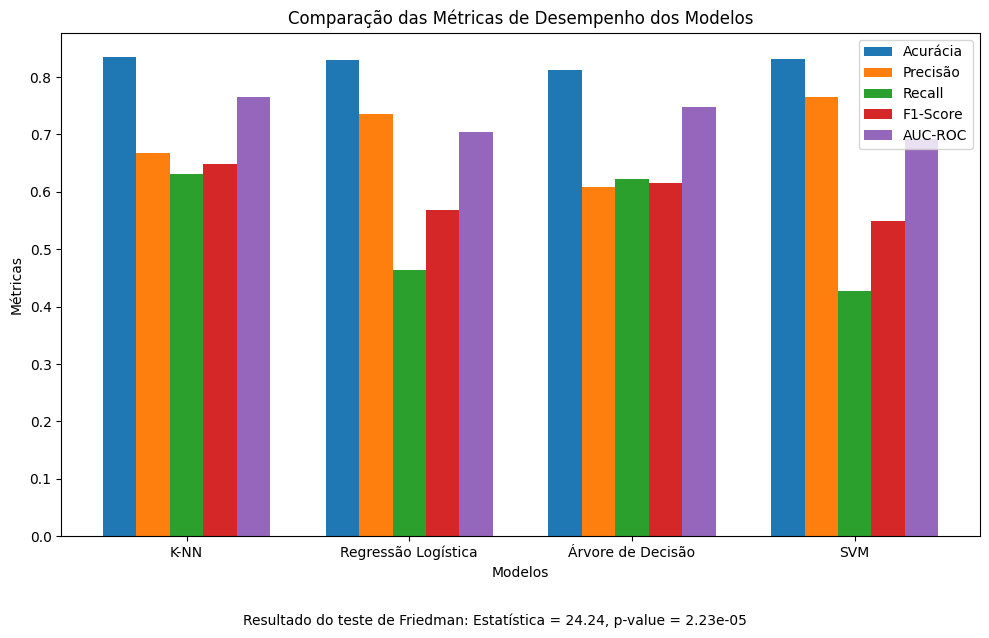

In [75]:
model_names = ['K-NN', 'Regressão Logística', 'Árvore de Decisão', 'SVM']
accuracy = [resultados_KNN[0], resultados_RL[0], resultados_AD[0], resultados_SVM[0]]
precision = [resultados_KNN[1], resultados_RL[1], resultados_AD[1], resultados_SVM[1]]
recall = [resultados_KNN[2], resultados_RL[2], resultados_AD[2], resultados_SVM[2]]
f1_score  = [resultados_KNN[3], resultados_RL[3], resultados_AD[3], resultados_SVM[3]]
auc_roc = [resultados_KNN[4], resultados_RL[4], resultados_AD[4], resultados_SVM[4]]

# Configurando o gráfico
x = np.arange(len(model_names))  # Posições no eixo x
width = 0.15  # Largura das barras

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as barras para cada métrica
bars1 = ax.bar(x - 2*width, accuracy, width, label='Acurácia')
bars2 = ax.bar(x - width, precision, width, label='Precisão')
bars3 = ax.bar(x, recall, width, label='Recall')
bars4 = ax.bar(x + width, f1_score, width, label='F1-Score')
bars5 = ax.bar(x + 2*width, auc_roc, width, label='AUC-ROC')

# Adicionando os rótulos
ax.set_xlabel('Modelos')
ax.set_ylabel('Métricas')
ax.set_title('Comparação das Métricas de Desempenho dos Modelos')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Adicionando o resultado do teste de Friedman no rodapé
plt.figtext(0.5, -0.05, f"Resultado do teste de Friedman: Estatística = {friedman_result.statistic:.2f}, p-value = {friedman_result.pvalue:.2e}", 
            wrap=True, horizontalalignment='center', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('../plots/models_comparate/compare_models.png', format='png', dpi=300, bbox_inches='tight')
plt.show()